Import stuffs

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf

Initialize path

In [2]:
path = "D:\Code\Python\LipReading\data" # Change to desired data path
path

'D:\\Code\\Python\\LipReading\\data'

Video paths

In [3]:
person_vids = []
for i in range(1):
    temp = "s" + str(i+1)
    temp = os.path.join(path, temp)
    person_vids.append(temp)
person_vids

['D:\\Code\\Python\\LipReading\\data\\s1']

In [4]:
extension = "mpg"
vid_paths = []
for person_vid in person_vids:
    file_list = os.listdir(person_vid)
    for file in file_list:
        if file.split(".")[-1] == extension:
            vid_path = os.path.join(person_vid, file)
            vid_paths.append(vid_path)
vid_paths[:5]

['D:\\Code\\Python\\LipReading\\data\\s1\\bbaf2n.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\bbaf3s.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\bbaf4p.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\bbaf5a.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\bbal6n.mpg']

In [5]:
len(vid_paths)

1000

In [6]:
vid_paths.index('D:\\Code\\Python\\LipReading\\data\\s1\\bbal6n.mpg')

4

Alignments paths

In [7]:
alignments_path = os.path.join(path, "alignments")
alignments_path

'D:\\Code\\Python\\LipReading\\data\\alignments'

In [8]:
person_aligns = []
for i in range(1):
    temp = "s" + str(i+1)
    temp = os.path.join(alignments_path, temp)
    person_aligns.append(temp)
person_aligns

['D:\\Code\\Python\\LipReading\\data\\alignments\\s1']

In [9]:
extension = "align"
align_paths = []
for person_align in person_aligns:
    file_list = os.listdir(person_align)
    for file in file_list:
        if file.split(".")[-1] == extension:
            align_path = os.path.join(person_align, file)
            align_paths.append(align_path)
align_paths[:5]

['D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbaf2n.align',
 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbaf3s.align',
 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbaf4p.align',
 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbaf5a.align',
 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\bbal6n.align']

In [76]:
align_paths.index('D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\pbio7a.align')

531

Load videos

In [10]:
import mediapipe as mp

# Initialize Mediapipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils 
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

In [12]:
vid_1 = []
cap = cv2.VideoCapture(vid_paths[363])
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    vid_1.append(frame)

vid_1 = np.array(vid_1)
vid_1.shape

(74, 288, 360, 3)

In [12]:
vid_indices = []
count = 0
for vid_path in vid_paths:
    cap = cv2.VideoCapture(vid_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        count += 1
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames < 75:
        vid_indices.append(vid_path)
vid_indices

['D:\\Code\\Python\\LipReading\\data\\s1\\lrae3s.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\sbbbzp.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\srbb4n.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\srwi5a.mpg',
 'D:\\Code\\Python\\LipReading\\data\\s1\\swao7a.mpg']

In [63]:
count

74995

In [107]:
vid_paths[4]

'D:\\Code\\Python\\LipReading\\data\\s1\\bbal6n.mpg'

In [14]:
test_frames = []

cap = cv2.VideoCapture(vid_paths[4])

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
            break
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    test_frames.append(frame)
cap.release()
len(test_frames)

75

In [35]:
s1_frames = []
for vid_path in vid_paths:
    if vid_path == 'D:\\Code\\Python\\LipReading\\data\\s1\\pbio7a.mpg':
        continue
    frames = []
    cap = cv2.VideoCapture(vid_path)
    if vid_path == 'D:\\Code\\Python\\LipReading\\data\\s1\\bbizzn.mpg':
        cap.set(cv2.CAP_PROP_POS_FRAMES, 12)
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(frame)
    if results.detections:
        detection = results.detections[0]
        bboxC = detection.location_data.relative_bounding_box
        ih, iw, _ = frame.shape
        x, y, w, h = int(bboxC.xmin*iw), int(bboxC.ymin*ih), int(bboxC.width*iw), int(bboxC.height*ih)
        h = h//2
    cap.release()
    cap = cv2.VideoCapture(vid_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)

        cropped_frame = frame[y+h:y+h*2, x:x+w]
        # cropped_frame = cropped_frame/255.0
        cropped_frame = cv2.resize(cropped_frame, (100,50))
        cropped_frame = tf.image.rgb_to_grayscale(cropped_frame)
        frames.append(cropped_frame)
    while len(frames) < 75:
        frames.append(frames[-1])
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    s1_frames.append(tf.cast((frames - mean), tf.float32)/ std)
    cap.release()
s1_frames = np.array(s1_frames)
s1_frames.shape

(999, 75, 50, 100, 1)

In [36]:
s1_frames[0][0][0][0]

array([0.13654423], dtype=float32)

In [39]:
np.save("s1_data_std", s1_frames)

In [20]:
test_frames = []
min_w = 361
min_h = 289
max_w = 0
max_h = 0
test_count = 0
cap = cv2.VideoCapture(vid_paths[45])
print(vid_paths[45])
bool = True
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    test_count += 1
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if bool == True:
        results = face_detection.process(frame)
        
        # Draw bounding boxes on faces
        if results.detections:
            detection = results.detections[0]
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = frame.shape
            x, y, w, h = int(bboxC.xmin*iw), int(bboxC.ymin*ih), int(bboxC.width*iw), int(bboxC.height*ih)
            h = h//2
        if min_w > w:
            min_w = w
            index_w = len(test_frames)
            name_w = vid_path
        if min_h > h:
            min_h = h
            index_h = len(test_frames)
            name_h = vid_path
        if max_w < w:
            max_w = w
        if max_h < h:
            max_h = h
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cropped_frame = frame[y+h:y+h*2, x:x+w]
    cropped_frame = cropped_frame / 255.0
    cropped_frame = cv2.resize(cropped_frame, (100,50))
    test_frames.append(cropped_frame)
    bool = False
cap.release()
len(test_frames)

D:\Code\Python\LipReading\data\s1\bbizzn.mpg


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [123]:
print(min_w, max_w, min_h, max_h)

121 128 60 64


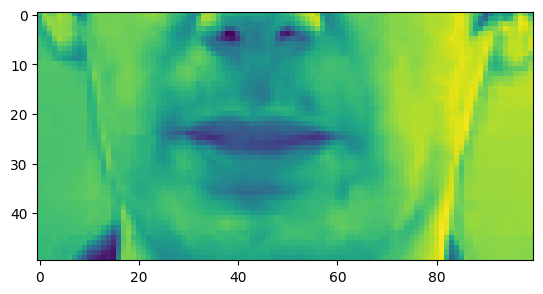

In [22]:
plt.imshow(s1_frames[4][1])

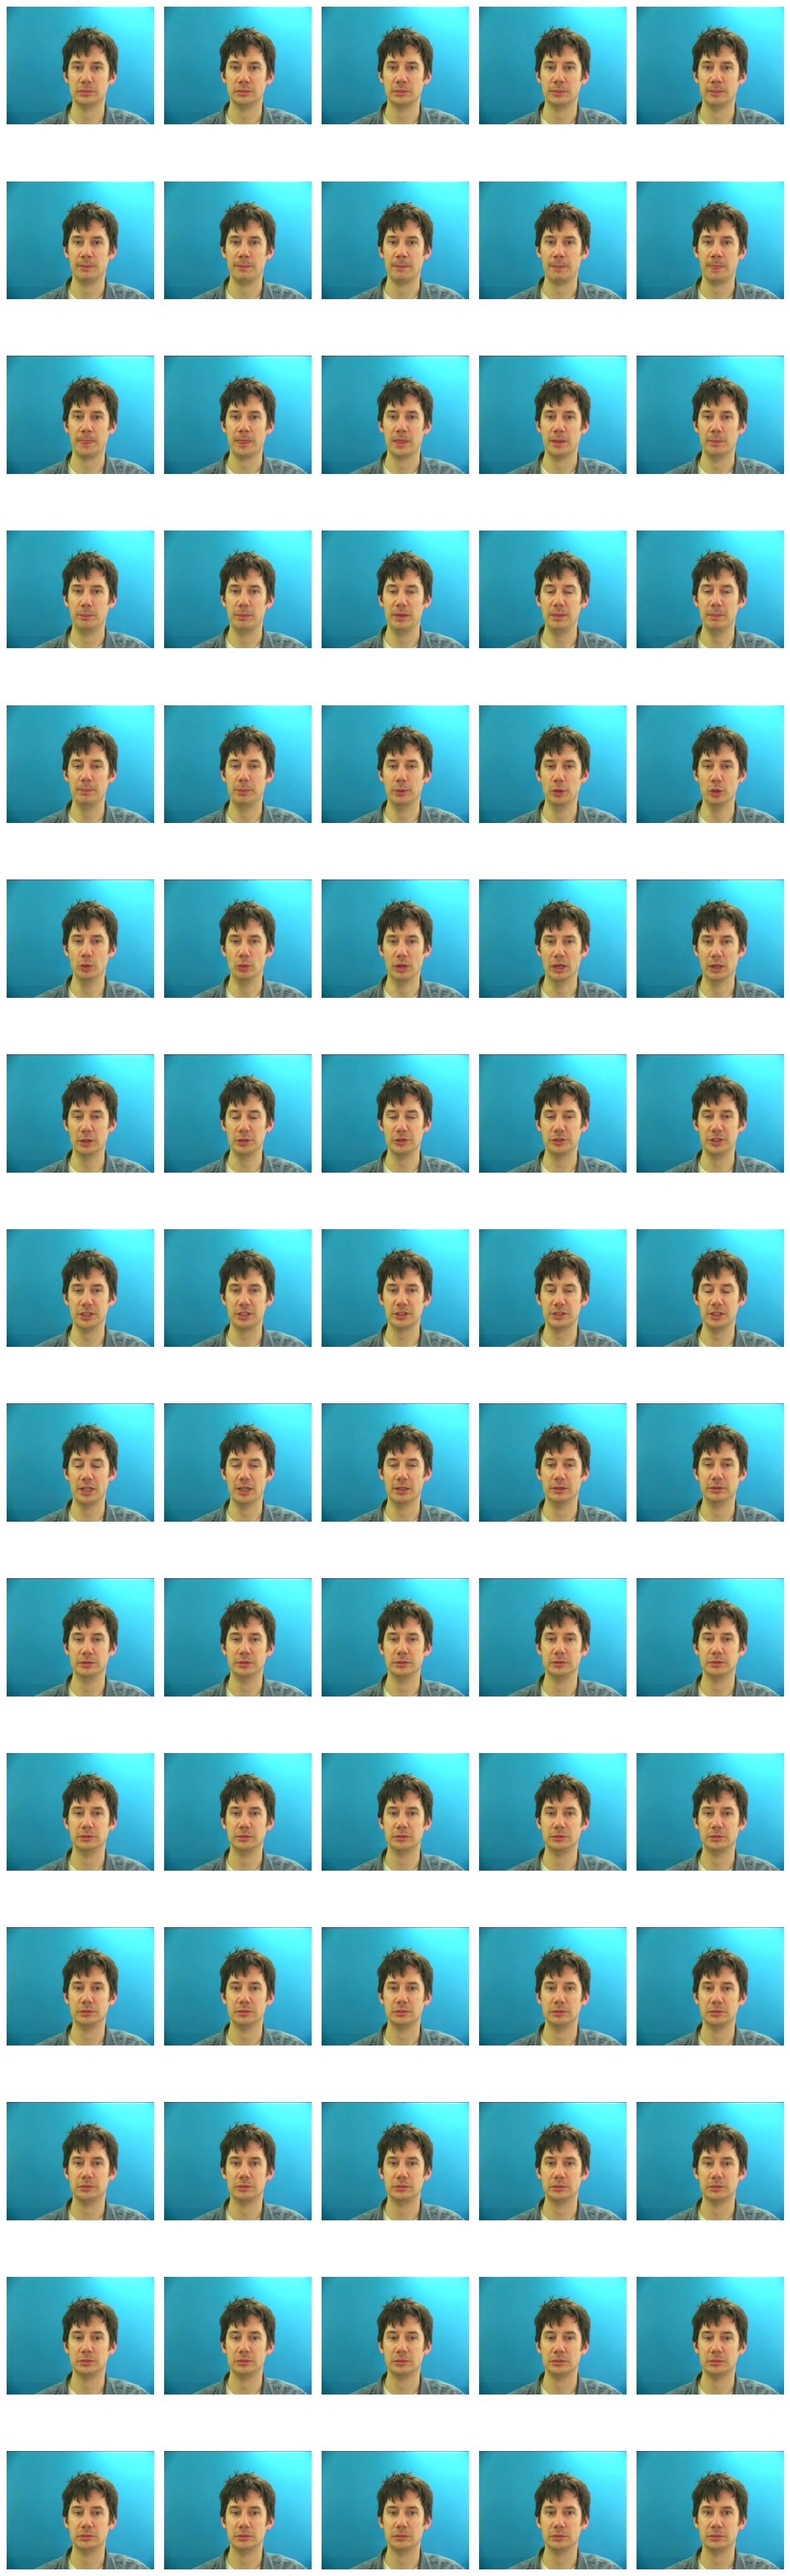

In [15]:
# plt.imshow(test_frames[1])
fig, axes = plt.subplots(15, 5, figsize=(12, 40))

# Loop through the images and plot them
for i in range(len(test_frames)):
    # Read the image using OpenCV (replace with your image loading code)
    plt.subplot(15,5,i+1)

    # Convert BGR to RGB (if needed)
    image = test_frames[i]
    
    # Display the image
    plt.imshow(image)
    
    # Remove axis labels and ticks
    plt.axis("off")

# Adjust layout to prevent clipping of axis labels
plt.tight_layout()

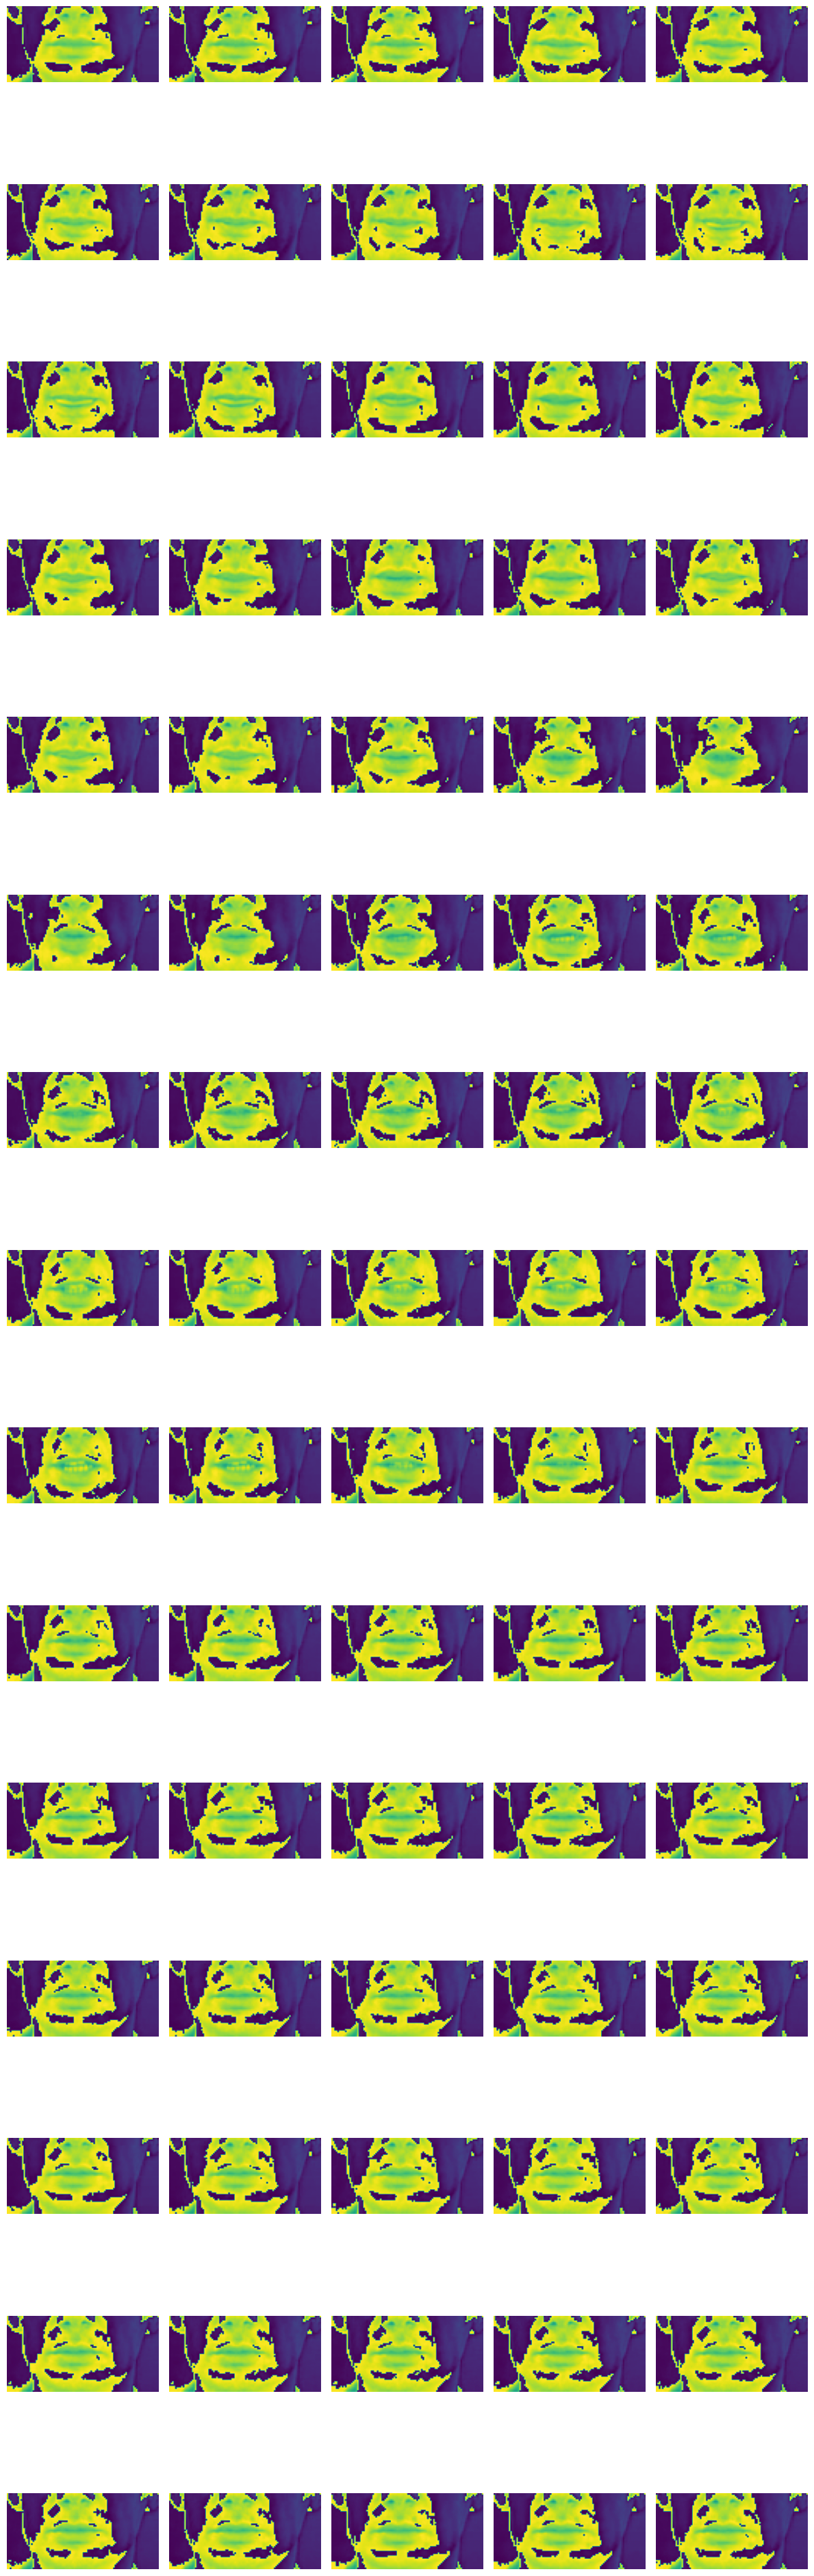

In [38]:
# plt.imshow(test_frames[1])
fig, axes = plt.subplots(15, 5, figsize=(12, 40))

# Loop through the images and plot them
for i in range(len(s1_frames[0])):
    # Read the image using OpenCV (replace with your image loading code)
    plt.subplot(15,5,i+1)

    # Convert BGR to RGB (if needed)
    image = s1_frames[4][i]
    
    # Display the image
    plt.imshow(image)
    
    # Remove axis labels and ticks
    plt.axis("off")

# Adjust layout to prevent clipping of axis labels
plt.tight_layout()

Load alignments

In [40]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz "]

In [41]:
len(vocab)

27

In [42]:
def load_chars_from_file(file_path):
    chars = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:-1]
        for line in lines:
            start, end, word = line.strip().split(' ')
            chars.extend(list(word))
            chars.append(" ")
        chars.pop()
    return chars

In [43]:
aligns = []
for file_path in align_paths:
    if file_path == 'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\pbio7a.align':
        continue
    chars = load_chars_from_file(file_path)
    aligns.append(chars)

In [44]:
flat = [item for sublist in aligns for item in sublist]

# Convert the 1D array into a set
all_chars = set(flat)

print(sorted(all_chars))

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [79]:
len(all_chars)

27

In [80]:
len(aligns)

999

In [45]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="", invert=True)

In [60]:
print(aligns[998])

['s', 'e', 't', ' ', 'w', 'h', 'i', 't', 'e', ' ', 'w', 'i', 't', 'h', ' ', 's', 'p', ' ', 'v', ' ', 'n', 'i', 'n', 'e', ' ', 'a', 'g', 'a', 'i', 'n']


In [62]:
align_paths[999]

'D:\\Code\\Python\\LipReading\\data\\alignments\\s1\\swwv9a.align'

In [65]:
max = 0
for align in aligns:
    if len(align) > max:
        max = len(align)
        index = align
max

31

In [68]:
for align in aligns:
    while len(align) < 40:
        align.append("")
len(aligns[0])

40

In [69]:
tokens = []
for align in aligns:
    tokens.append(char_to_num(align))
tokens = np.array(tokens)

In [71]:
np.save("s1_tokens", tokens)

In [38]:
num_to_char([1,2,3])

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a', b'b', b'c'], dtype=object)>